### comparing ortho height with lake surface level

In [ ]:
import numpy as np
import xarray as xr
import seaborn as sns
from glob import glob
import geopandas as gpd
import matplotlib.pyplot as plt
from utils.pixc2raster import pixc2raster
from utils.functions import meter2deg, points_directional_stats, points_directional_sector


In [31]:
## chaohu
paths_pixc_height_chaohu = sorted(glob('data/chaohu-lake/swot-pixc/*filtered_height.nc')) 
path_vec_chaohu = 'data/chaohu-lake/hydrolake_chaohu.gpkg'
## dianchi
paths_pixc_height_dianchi = sorted(glob('data/dianchi-lake/swot-pixc/*filtered_height.nc')) 
path_vec_dianchi = 'data/dianchi-lake/hydrolake_dianchi_edit.gpkg'
## gyaring
paths_pixc_height_gyaring = sorted(glob('data/gyaring-lake/swot-pixc/*filtered_height.nc'))
path_vec_gyaring = 'data/gyaring-lake/hydrolake_gyaring.gpkg'
## hulun 
paths_pixc_height_hulun = sorted(glob('data/hulun-lake/swot-pixc/*filtered_height.nc'))
path_vec_hulun = 'data/hulun-lake/hydrolake_hulun.gpkg'
## siling_co
paths_pixc_height_siling = sorted(glob('data/siling_co-lake/swot-pixc/*filtered_height.nc'))
path_vec_siling = 'data/siling_co-lake/hydrolake_siling_co.gpkg'


In [32]:
## 1. read vector file of the lake.
chaohu_gdf = gpd.read_file(path_vec_chaohu)
dianchi_gdf = gpd.read_file(path_vec_dianchi)
gyaring_gdf = gpd.read_file(path_vec_gyaring)
hulun_gdf = gpd.read_file(path_vec_hulun)
siling_gdf = gpd.read_file(path_vec_siling)
## 2. read pixel cloud data
pixc_height_chaohu_xr = xr.open_dataset(paths_pixc_height_chaohu[4])
pixc_height_dianchi_xr = xr.open_dataset(paths_pixc_height_dianchi[3])
pixc_height_gyaring_xr = xr.open_dataset(paths_pixc_height_gyaring[5])  ## 4-9
pixc_height_hulun_xr = xr.open_dataset(paths_pixc_height_hulun[4])      ## 4-9
pixc_height_siling_xr = xr.open_dataset(paths_pixc_height_siling[2])    ## 2-10


In [80]:
dif_ht_chaohu = pixc_height_chaohu_xr['ht_ortho']-pixc_height_chaohu_xr['ht_ortho_cor']
dif_ht_dianchi = pixc_height_dianchi_xr['ht_ortho']-pixc_height_dianchi_xr['ht_ortho_cor']
dif_ht_gyaring = pixc_height_gyaring_xr['ht_ortho']-pixc_height_gyaring_xr['ht_ortho_cor']
dif_ht_hulun = pixc_height_hulun_xr['ht_ortho']-pixc_height_hulun_xr['ht_ortho_cor']
dif_ht_siling = pixc_height_siling_xr['ht_ortho']-pixc_height_siling_xr['ht_ortho_cor']


In [34]:
dif_mean_chaohu, dif_std_chaohu = np.nanmean(dif_ht_chaohu.values), np.nanstd(dif_ht_chaohu.values) 
dif_mean_dianchi, dif_std_dianchi = np.nanmean(dif_ht_dianchi.values), np.nanstd(dif_ht_dianchi.values) 
dif_mean_gyaring, dif_std_gyaring = np.nanmean(dif_ht_gyaring.values), np.nanstd(dif_ht_gyaring.values) 
dif_mean_hulun, dif_std_hulun = np.nanmean(dif_ht_hulun.values), np.nanstd(dif_ht_hulun.values) 
dif_mean_siling, dif_std_siling = np.nanmean(dif_ht_siling.values), np.nanstd(dif_ht_siling.values) 
print(dif_mean_chaohu, dif_mean_dianchi, dif_mean_gyaring, dif_mean_hulun, dif_mean_siling) 
print(dif_std_chaohu, dif_std_dianchi, dif_std_gyaring, dif_std_hulun, dif_std_siling) 


-0.5794607311571209 -0.041258588088206975 0.02873704759504274 -0.2140698788074024 0.08583477407114806
0.05653138448800724 0.05202451770997936 0.08569604923272325 0.06150340188813765 0.05966592615233189


In [ ]:
ht_difs = [dif_ht_chaohu.values, dif_ht_dianchi.values, 
           dif_ht_gyaring.values, dif_ht_hulun.values, dif_ht_siling.values]


Text(0.5, 1.0, 'Height Difference Distribution')

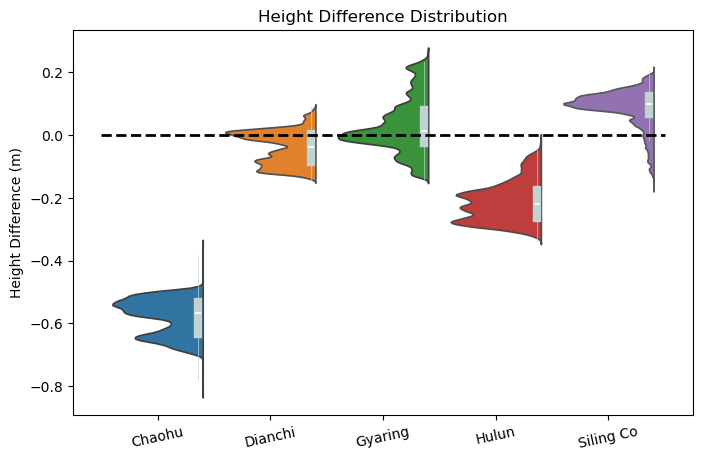

In [82]:
fig, ax = plt.subplots(figsize=(8, 5))
for i in range(len(ht_difs)):
    sns.violinplot(x=i, y=ht_difs[i], split=True,  
                 inner_kws=dict(box_width=6, whis_width=0.5, color="#BFD3D3"),  
                 ax=ax)
ax.set_xticks([0, 1, 2, 3, 4])
ax.hlines(0, -0.5, 4.5, colors='black', linestyles='--', linewidth=2)
ax.set_xticklabels(['Chaohu', 'Dianchi', 'Gyaring', 'Hulun', 'Siling Co'], rotation=12)
ax.set_ylabel('Height Difference (m)')
ax.set_title(f'Height Difference Distribution', fontsize=12)


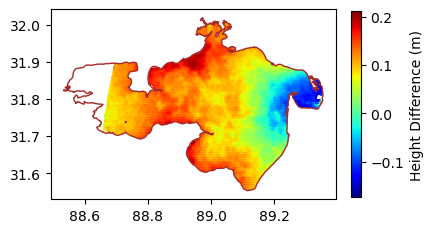

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
scat1 = ax.scatter(x=pixc_height_siling_xr.longitude, 
                          y=pixc_height_siling_xr.latitude, 
                          c=dif_ht_siling, s=0.1, 
                          # vmin=-0.5, vmax=0.5,
                          edgecolor='none', cmap='jet')
siling_gdf.plot(ax=ax, edgecolor='Brown', facecolor='none', linewidth=1)
cbar = plt.colorbar(scat1, ax=ax, orientation='vertical', fraction=0.03)
cbar.set_label('Height Difference (m)')

